In [1]:
#由于资料的偏差与跨度会影响机器学习的成效，因此正规化(标准化)数据可以提升机器学习的成效。
#数据标准化
# 标准化数据模块
from sklearn import preprocessing
import numpy as np
# 将资料分割成train与test的模块
from sklearn.model_selection import train_test_split
# 生成适合做classification资料的模块
from sklearn.datasets.samples_generator import make_classification
# Support Vector Machine中的Support Vector Classifier
from sklearn.svm import SVC
# 可视化数据的模块
import matplotlib.pyplot as plt

#建立array
a = np.array([[10, 2.7, 3.6],
                     [-100, 5, -2],
                     [120, 20, 40]], dtype=np.float64)
##将normalized后的a打印出来
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


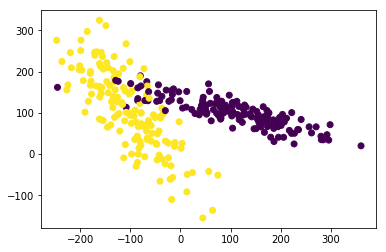

In [2]:
#生成具有2种属性的300笔数据
X, y = make_classification(n_samples=300, n_features=2 , n_redundant=0, n_informative=2,
                           random_state=22, n_clusters_per_class=1, scale=100)
#可视化数据
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [1]:
X = preprocessing.scale(X)    # normalization step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

NameError: name 'preprocessing' is not defined

In [ ]:
from sklearn.learning_curve import validation_curve #validation_curve模块
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np

#digits数据集
digits = load_digits()
X = digits.data
y = digits.target

#建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='mean_squared_error')

#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()